# Correlación cruzada

La correlación cruzada nos permite filtrar una imagen a través del uso de un kernel. En este ejercicio implementaremos la correlación cruzada.

La definición de la operación es la siguiente:
$$
	G[i,j] =  \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] I[i+u,j+v]
$$
donde $I$ es la imagen de entrada y $H$ el kernel.

Visualmente tendríamos algo similar a la siguiente figura. Donde la imagen original esta en azul y la imagen resultante está en verde.

![](full_padding_no_strides_transposed_00.png)

In [1]:
# paquetes necesarios
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

## Implementación del kernel

El kernel ($H$) es una matriz cuadrada cuyas dimensiones son $(2k+1) \times (2k+1)$, donde $k$ es un número entero positivo. Al utilizar el parámetro $k$ aseguramos que el kernel tenga tamaño impar. Los elementos de $k$ pueden tener valores arbitrarios de acuerdo al efecto que deseemos (los veremos más tarde). Por ahora, diremos que es deseable que la sumatoria de sus elementos sea igual a 1, si la sumatoria no es igual a 1 la imagen de salida será escalada. 

En este ejemplo, supondremos que $k=1$ y que los elementos de $H$ son iguales. Por tanto, cada elemento de $H$ es igual a $\dfrac{1}{(2k+1)^2}$ Es decir: 

\begin{equation}
H =
\begin{array}{|c|c|c|}
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ 
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ 
			\hline
			\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
			\hline
\end{array}
\end{equation}

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


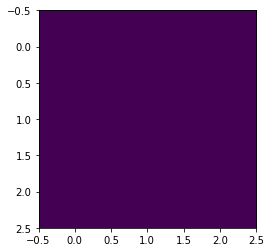

In [2]:
# Definir kernel (filtro)
k = 1
tamano = 2 * k + 1
kernel = np.ones((tamano, tamano), np.float32) / (tamano**2)

# imprimir el filtro
print(kernel)
plt.imshow(kernel)
plt.show()

## Implementar correlación-cruzada

Recordando que:

$$
	G[i,j] =  \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] I[i+u,j+v]
$$
donde $I$ es la imagen de entrada y $H$ el kernel.

### Padding

Si el kernel 'queda' fuera de la imagen original el resultado debe ser 0. A este proceso de determinar que hacer cuando el kernel queda fuera le llamaremos 'padding'. Para este ejemplo estamos usando un 'padding' *igual* por que la imagen resultante queda del mismo tamaño.

![](same_padding_no_strides_00.png)

In [3]:
# Primero implementaremos la función tal cual se definió para el elemento i,j
def correlacionPixel(H, I, i, j):    
    # Realiza la operación de correlación para el pixel i, j
    # Valida que accedas a elementos válidos en I
    m, n = I.shape
    sumatoria = 0

    for u in range(-k,k+1):
        for v in range(-k,k+1):
            if (i+u < 0 or i+u >= m or j+v < 0 or j+v >= n):
                sumatoria = 0 
            else:
                sumatoria += H[u+k, v+k] * I[i+u, j+v]
    return sumatoria

def correlacionCruzada(H, I):
    dkm1, _ = H.shape
    k = (dkm1 - 1)/2
    m, n = I.shape
    G = np.zeros((m,n))

    # Realiza la correlación para cada elemento de I
    for i in range(m):
        for j in range(n):
            G[i,j] = correlacionPixel(H,I,i,j)
    
    return G

## Validar función

In [4]:
#Valida el resultado para un elemento de una imagen de prueba
Ip = np.ones((5,5))
print(Ip)

print(correlacionPixel(H = kernel, I=Ip, i=1,j=1))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
1.0000000074505806


('Esta imagen es de tipo:', dtype('uint8'), 'con dimensiones:', (512, 512))


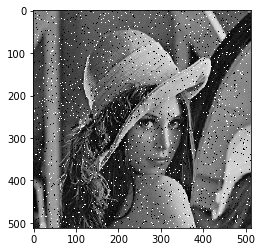

In [5]:
# Leer la imagen con ruido de sal y pimienta
lenna_sp = cv2.imread('lenna_sp.png')
lenna_sp = cv2.cvtColor(lenna_sp, cv2.COLOR_BGR2GRAY)

# Desplegar información y graficar la imagen
print('Esta imagen es de tipo:', lenna_sp.dtype, 'con dimensiones:', lenna_sp.shape)
plt.imshow(lenna_sp, cmap = 'gray') 
plt.show()

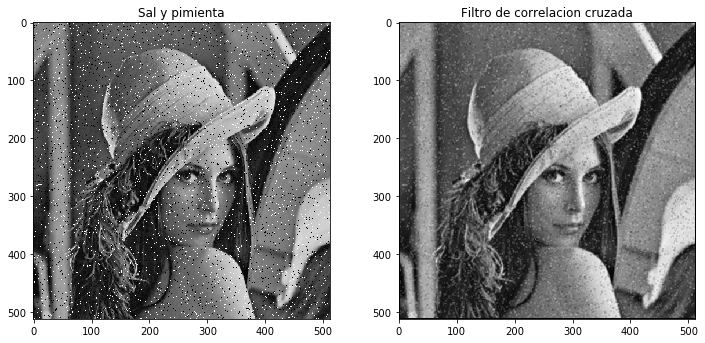

In [6]:
#aplicar la correlación cruzada
resultado = correlacionCruzada(H = kernel, I = lenna_sp)

plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.imshow(lenna_sp, cmap = 'gray')
plt.title('Sal y pimienta')

plt.subplot(222)
plt.imshow(resultado, cmap = 'gray')
plt.title('Filtro de correlacion cruzada')

plt.show()